Naive Bayes Model Comparison Lab Submission
1.   Differences Between the Three Naive Bayes Classifiers

GaussianNB:
Assumes that the features follow a normal (Gaussian) distribution. Suitable for continuous data.

MultinomialNB:
Designed for count-based or discrete data (e.g., word counts in text classification).

BernoulliNB:
Designed for binary/boolean features. Models the presence or absence of a feature rather than its count.

In [8]:
import pandas as pd

df=pd.read_csv('fraud.csv', index_col = 0).dropna() # Drop rows with NaN values
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.40,
                                    random_state=1)

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [11]:
#Added by Ei Ei Tun
y_pred = gnb.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[8349  192]
 [  19  118]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      8541
           1       0.38      0.86      0.53       137

    accuracy                           0.98      8678
   macro avg       0.69      0.92      0.76      8678
weighted avg       0.99      0.98      0.98      8678

Accuracy: 0.9756856418529615


In [4]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1.0)
#mnb.fit(X_train, y_train)

In [13]:
#Added by Ei Ei Tun
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to scale the data to a non-negative range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, fit the MultinomialNB model with the scaled data
mnb.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = mnb.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9842
Confusion Matrix:
[[8541    0]
 [ 137    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8541
           1       0.00      0.00      0.00       137

    accuracy                           0.98      8678
   macro avg       0.49      0.50      0.50      8678
weighted avg       0.97      0.98      0.98      8678



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train, y_train)

BernoulliNB()

In [15]:
#Added by Ei Ei Tun
# Make predictions on the test set
y_pred = bnb.predict(X_test)

# Evaluate the model

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 3. Classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9948
Confusion Matrix:
[[8533    8]
 [  37  100]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.93      0.73      0.82       137

    accuracy                           0.99      8678
   macro avg       0.96      0.86      0.91      8678
weighted avg       0.99      0.99      0.99      8678



2. Precision and Recall Comparison

| Model         | Precision (Class 1) | Recall (Class 1) | Accuracy |
| ------------- | ------------------- | ---------------- | -------- |
| GaussianNB    | 0.38                | 0.86             | 0.976    |
| MultinomialNB | 0.00                | 0.00             | 0.984    |
| BernoulliNB   | 0.93                | 0.73             | 0.995    |


Observation:

GaussianNB has high recall (0.86) for fraudulent transactions (Class 1), meaning it catches most fraud cases.

MultinomialNB fails to detect fraud (recall = 0), despite slightly higher overall accuracy.

BernoulliNB achieves high precision (0.93) and decent recall (0.73), balancing false positives and detection.

3. Model Choice for Fraud Detection

In fraud detection, the main priority is to detect as many fraudulent transactions as possible (high recall), while keeping false alarms reasonable.

GaussianNB is strong in recall (0.86) but has lower precision (0.38), meaning more false positives.

BernoulliNB provides a good balance: high precision (0.93) and reasonably high recall (0.73), reducing false positives while still catching most fraud.

MultinomialNB is not suitable for this dataset as it fails to detect fraud.

Conclusion:
BernoulliNB is the recommended model for fraud detection in this case because it balances precision and recall effectively, making it reliable for practical use.

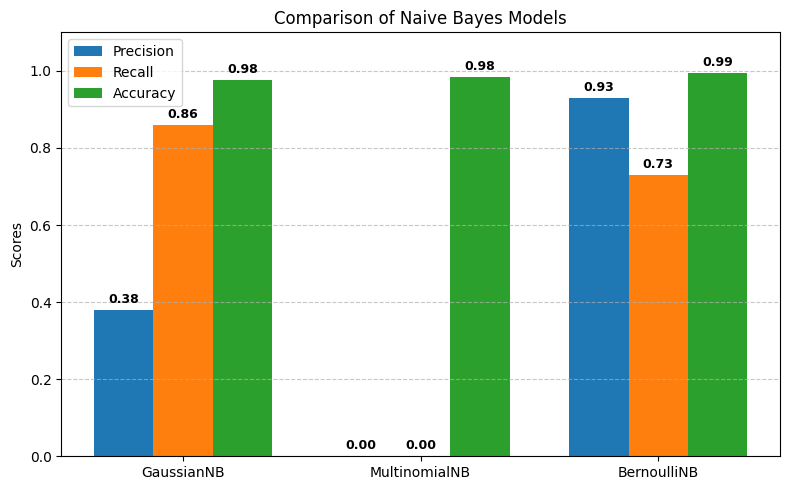

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
precision = [0.38, 0.00, 0.93]
recall = [0.86, 0.00, 0.73]
accuracy = [0.976, 0.984, 0.995]

x = np.arange(len(models))  # label locations
width = 0.25  # width of the bars

# Create figure
fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='#1f77b4')
rects2 = ax.bar(x, recall, width, label='Recall', color='#ff7f0e')
rects3 = ax.bar(x + width, accuracy, width, label='Accuracy', color='#2ca02c')

# Add labels, title, and ticks
ax.set_ylabel('Scores')
ax.set_title('Comparison of Naive Bayes Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()

# Add values on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9,
                    fontweight='bold')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Add grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Tight layout for cleaner look
fig.tight_layout()

plt.show()
